In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score , confusion_matrix , roc_auc_score , roc_curve
# from ydata_profiling import ProfileReport
# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model, tree, ensemble
from sklearn.svm import SVC
rbf_model = SVC(kernel='rbf')
import warnings
warnings.filterwarnings("ignore")
# import math

In [2]:
df = pd.read_csv("heart_failure_clinical_records1.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.shape

(918, 12)

In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df_cols = df.columns
df_cols

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [7]:
df.notnull().sum()

Age               918
Sex               918
ChestPainType     918
RestingBP         918
Cholesterol       918
FastingBS         918
RestingECG        918
MaxHR             918
ExerciseAngina    918
Oldpeak           918
ST_Slope          918
HeartDisease      918
dtype: int64

In [8]:
for column in df.select_dtypes(include=['object']).columns:
    num_unique_values = df[column].nunique()
    print(f"Number of distinct values in {column}: {num_unique_values}")

Number of distinct values in Sex: 2
Number of distinct values in ChestPainType: 4
Number of distinct values in RestingECG: 3
Number of distinct values in ExerciseAngina: 2
Number of distinct values in ST_Slope: 3


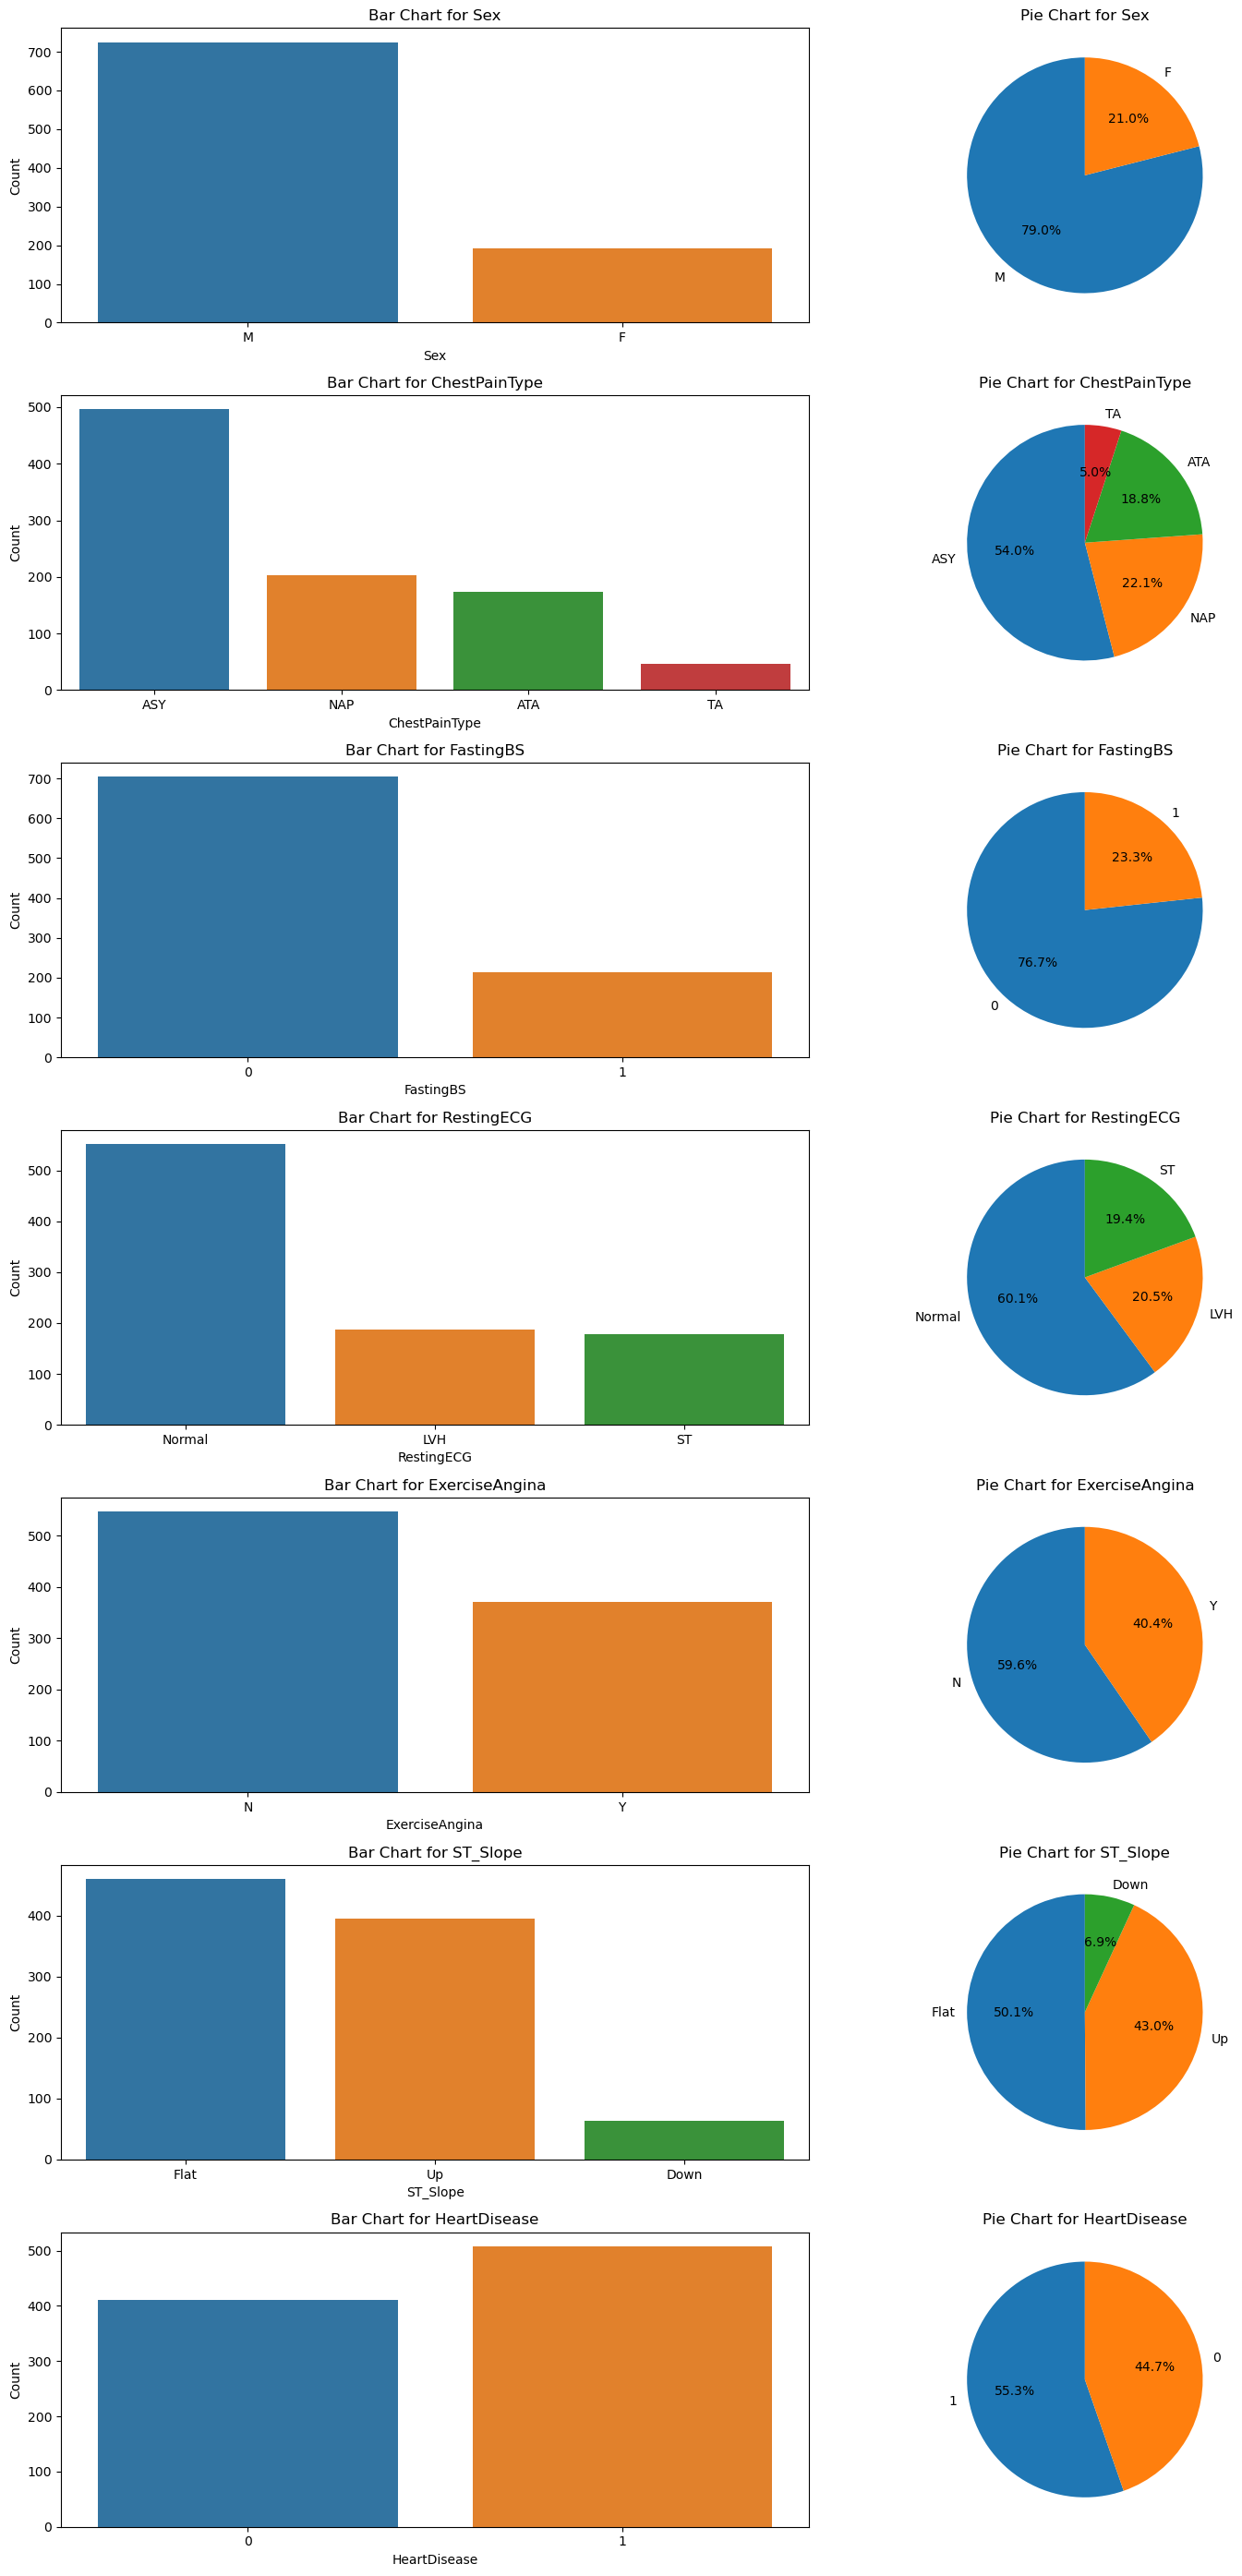

In [9]:
# df_cat = df[[obj for obj in df.select_dtypes(include=['object']).columns]]

df_cat = df[[obj for obj in df.columns if df[obj].dtype =='object' or obj == 'HeartDisease' or obj == 'FastingBS']]


df_cat

fig, axes = plt.subplots(df_cat.shape[1], 2, figsize=(16, 4 * df_cat.shape[1]))
for i, column in enumerate(df_cat.columns):
    value_counts = df_cat[column].value_counts()
    count = value_counts.values
    labels = value_counts.index

    # Bar chart
    sns.barplot(x=labels, y=count, orient='v', ax=axes[i, 0])
    sns.barplot()
    axes[i, 0].set_title(f'Bar Chart for {column}')
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel('Count')

    # Pie chart
    axes[i, 1].pie(count, labels=labels, autopct='%1.1f%%', startangle=90)
    axes[i, 1].set_title(f'Pie Chart for {column}')

fig.tight_layout()
plt.show()

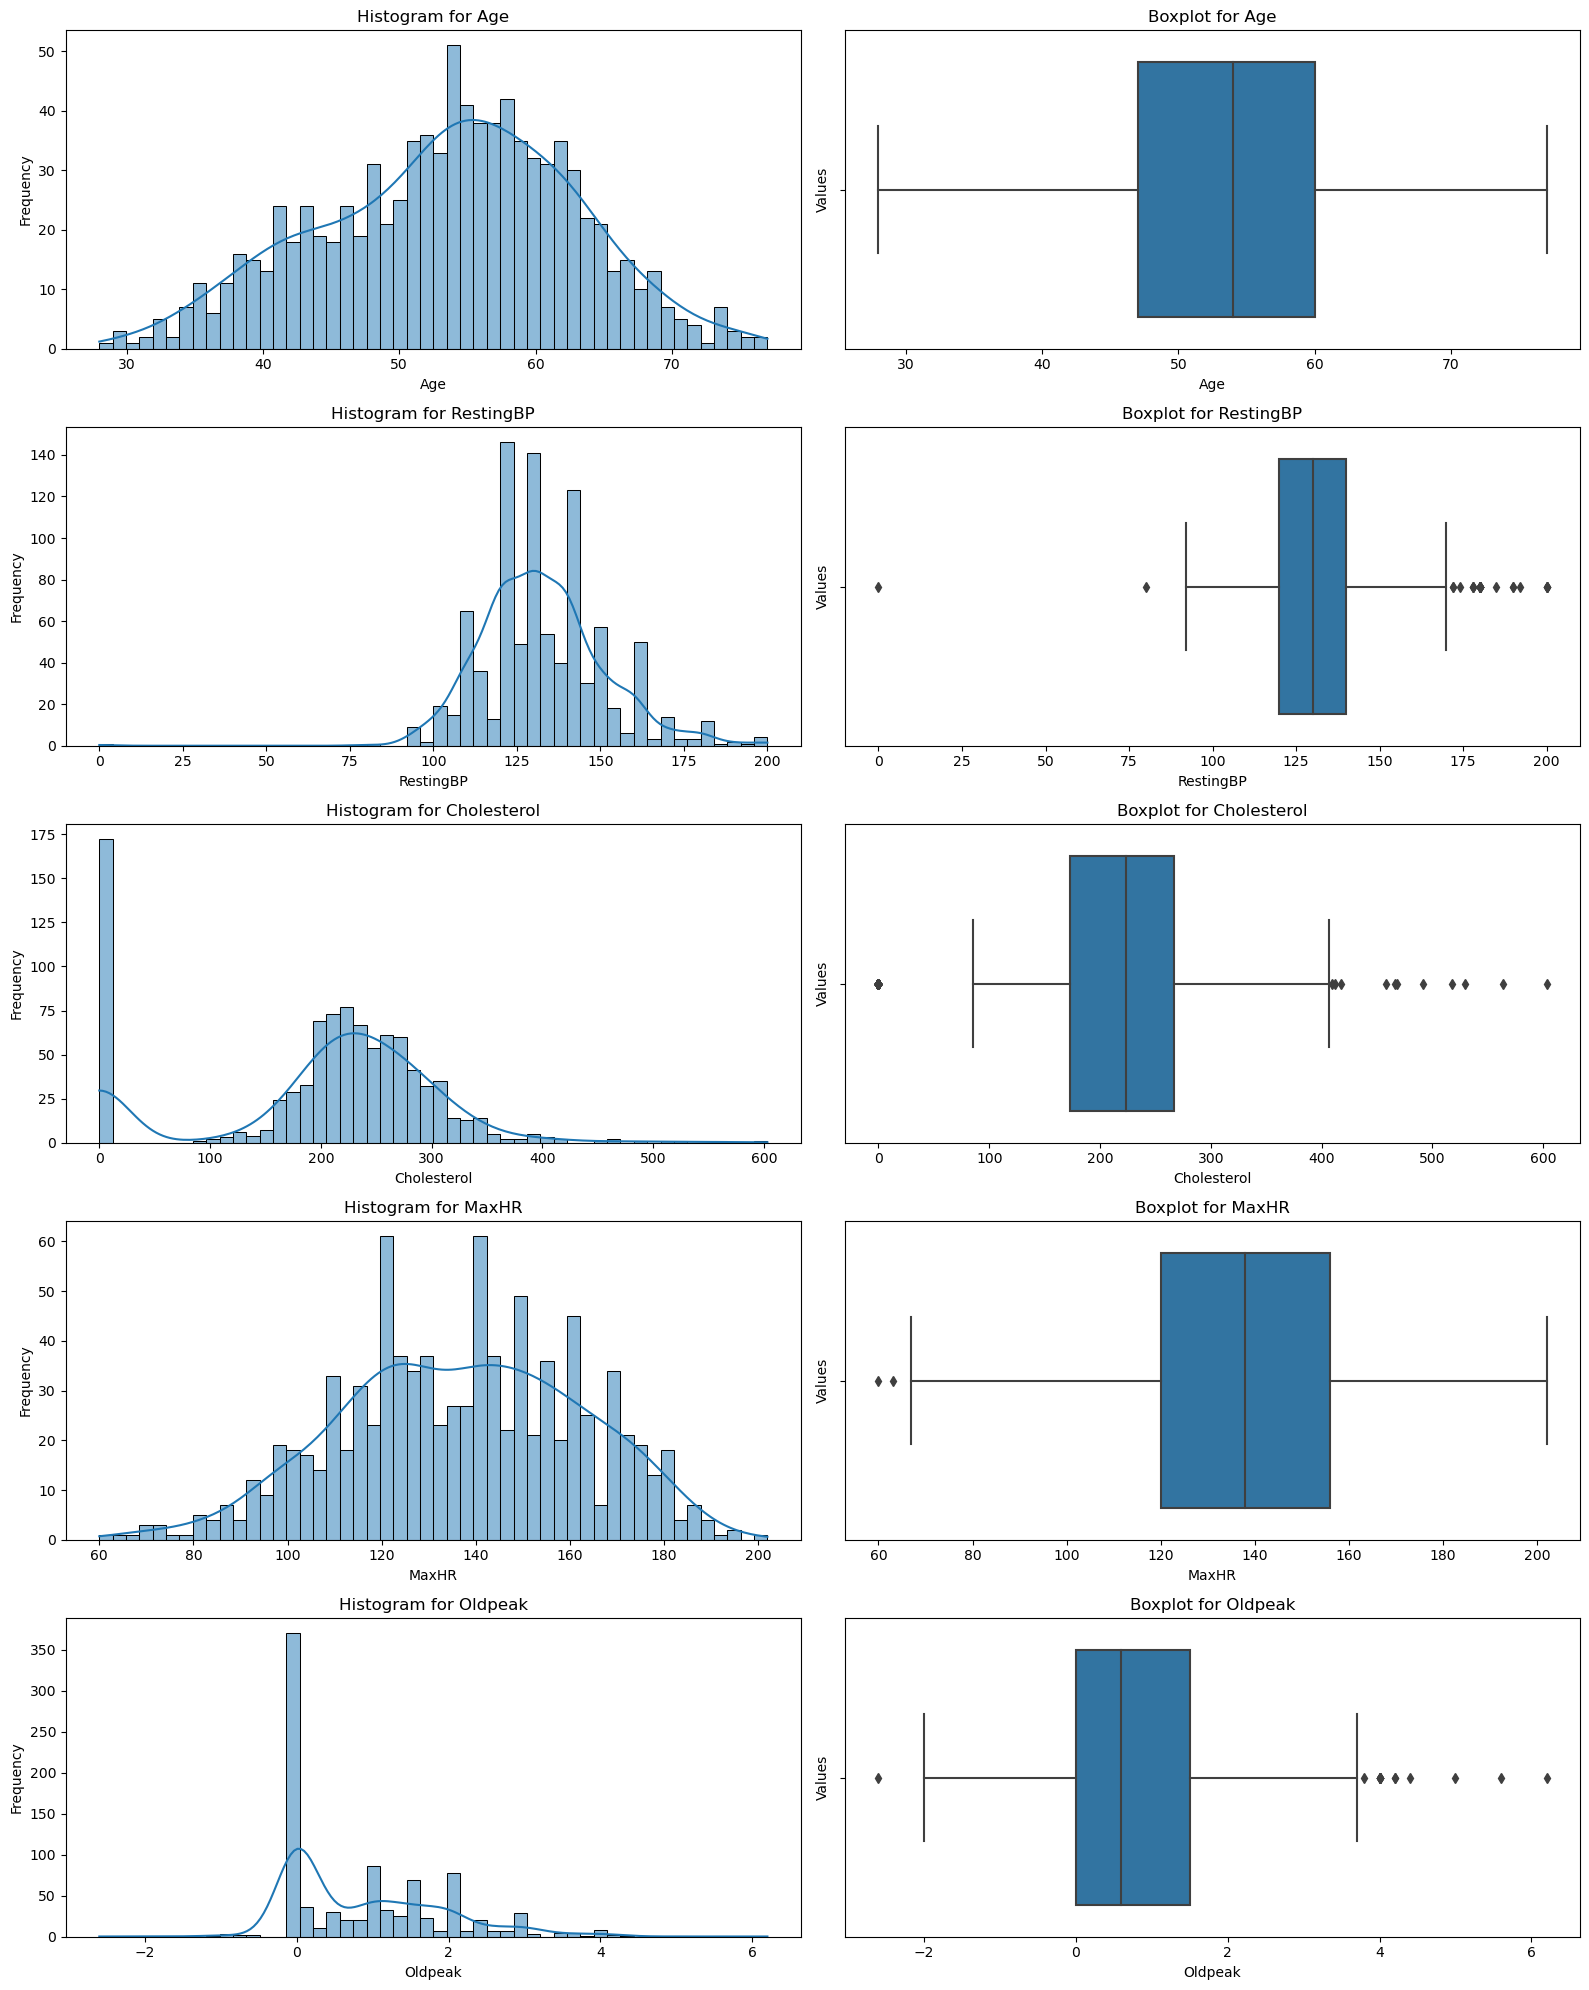

In [10]:
df_num = df[[obj for obj in df.select_dtypes(exclude=['object']).columns 
             if obj != 'HeartDisease' and obj != 'FastingBS' ]]
df_num


fig, axes = plt.subplots(df_num.shape[1], 2, figsize=(16, 4 * df_num.shape[1]))

for i, column in enumerate(df_num.columns):
    # Histogram
    sns.histplot(x=df_num[column], bins=50, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram for {column}')
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel('Frequency')

    # Boxplot
    sns.boxplot(x=df_num[column], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot for {column}')
    axes[i, 1].set_xlabel(column)
    axes[i, 1].set_ylabel('Values')

fig.tight_layout()
plt.show()

In [11]:
zero_restingBP = df[df['RestingBP']==0]
zero_restingBP

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [12]:
zero_restingBPMoreThan170 = df[df['RestingBP']>170]
zero_restingBPMoreThan170

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0
123,58,F,ATA,180,393,0,Normal,110,Y,1.0,Flat,1
189,53,M,ASY,180,285,0,ST,120,Y,1.5,Flat,1
190,46,M,ASY,180,280,0,ST,120,N,0.0,Up,0
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1
274,45,F,ATA,180,295,0,Normal,180,N,0.0,Up,0
275,59,M,NAP,180,213,0,Normal,100,N,0.0,Up,0
278,57,F,ASY,180,347,0,ST,126,Y,0.8,Flat,0
365,64,F,ASY,200,0,0,Normal,140,Y,1.0,Flat,1
372,63,M,ASY,185,0,0,Normal,98,Y,0.0,Up,1


In [13]:
df_encoded = pd.get_dummies(df, columns=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'], prefix='Category',dtype='int')
df_encoded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Category_F,Category_M,Category_ASY,...,Category_NAP,Category_TA,Category_LVH,Category_Normal,Category_ST,Category_N,Category_Y,Category_Down,Category_Flat,Category_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [14]:
df_encoded.shape

(918, 21)

In [15]:
df_corr=df_encoded.corr()
df_corr

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Category_F,Category_M,Category_ASY,...,Category_NAP,Category_TA,Category_LVH,Category_Normal,Category_ST,Category_N,Category_Y,Category_Down,Category_Flat,Category_Up
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039,-0.055750,0.055750,0.166607,...,-0.011335,0.032042,0.145727,-0.230566,0.136798,-0.215793,0.215793,0.138397,0.185568,-0.258067
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589,-0.005133,0.005133,0.048824,...,-0.041348,0.049855,0.053166,-0.116851,0.090447,-0.155101,0.155101,-0.007912,0.099207,-0.096146
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741,0.200092,-0.200092,-0.120531,...,-0.006634,0.017365,0.177077,-0.038470,-0.133106,0.034166,-0.034166,-0.083371,-0.050953,0.094027
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291,-0.120076,0.120076,0.131176,...,-0.039249,0.026885,-0.011656,-0.093028,0.127110,-0.060451,0.060451,0.105102,0.107006,-0.161730
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421,0.189186,-0.189186,-0.354963,...,0.134580,0.100025,0.125793,0.023801,-0.157879,0.370425,-0.370425,-0.073316,-0.342581,0.383397
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951,-0.105734,0.105734,0.280026,...,-0.106212,0.032231,0.086794,-0.116719,0.055958,-0.408752,0.408752,0.322130,0.283295,-0.450577
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000,-0.305445,0.305445,0.516716,...,-0.212964,-0.054790,0.010670,-0.091580,0.102527,-0.494282,0.494282,0.122527,0.554134,-0.622164
Category_F,-0.055750,-0.005133,0.200092,-0.120076,0.189186,-0.105734,-0.305445,1.000000,-1.000000,-0.183876,...,0.066486,0.004031,0.049518,0.010634,-0.063715,0.190664,-0.190664,-0.066036,-0.116077,0.150942
Category_M,0.055750,0.005133,-0.200092,0.120076,-0.189186,0.105734,0.305445,-1.000000,1.000000,0.183876,...,-0.066486,-0.004031,-0.049518,-0.010634,0.063715,-0.190664,0.190664,0.066036,0.116077,-0.150942
Category_ASY,0.166607,0.048824,-0.120531,0.131176,-0.354963,0.280026,0.516716,-0.183876,0.183876,1.000000,...,-0.577670,-0.249003,0.002289,-0.063606,0.076438,-0.430034,0.430034,0.103407,0.303645,-0.359443


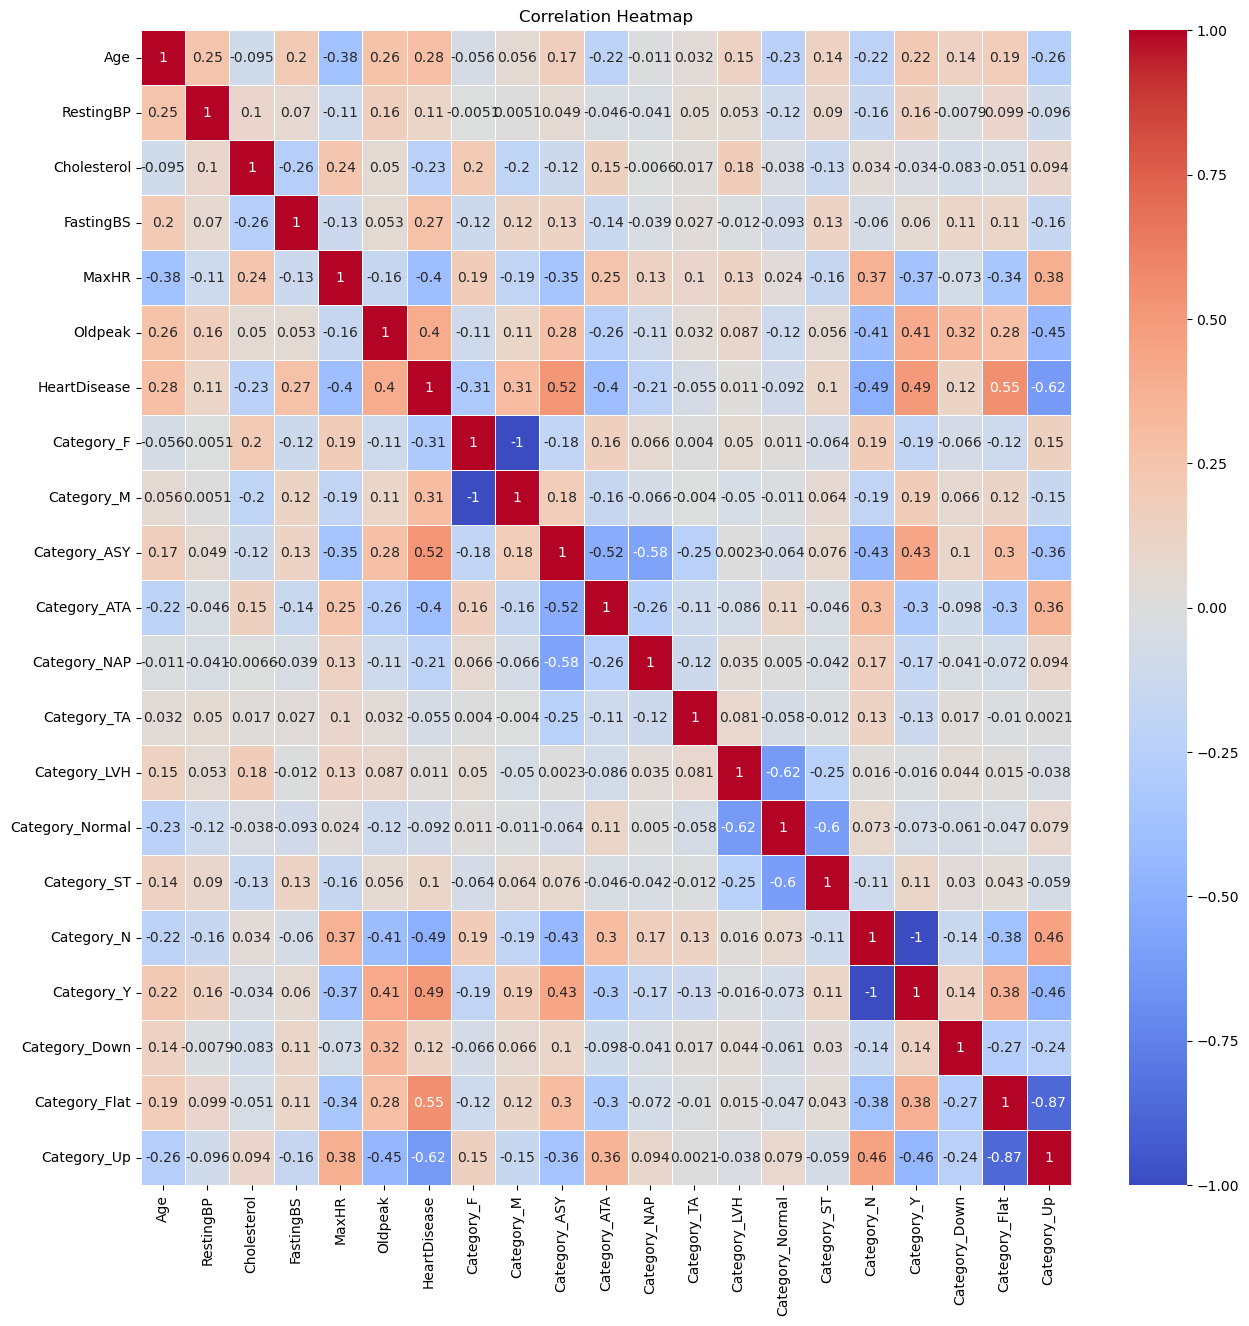

In [16]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

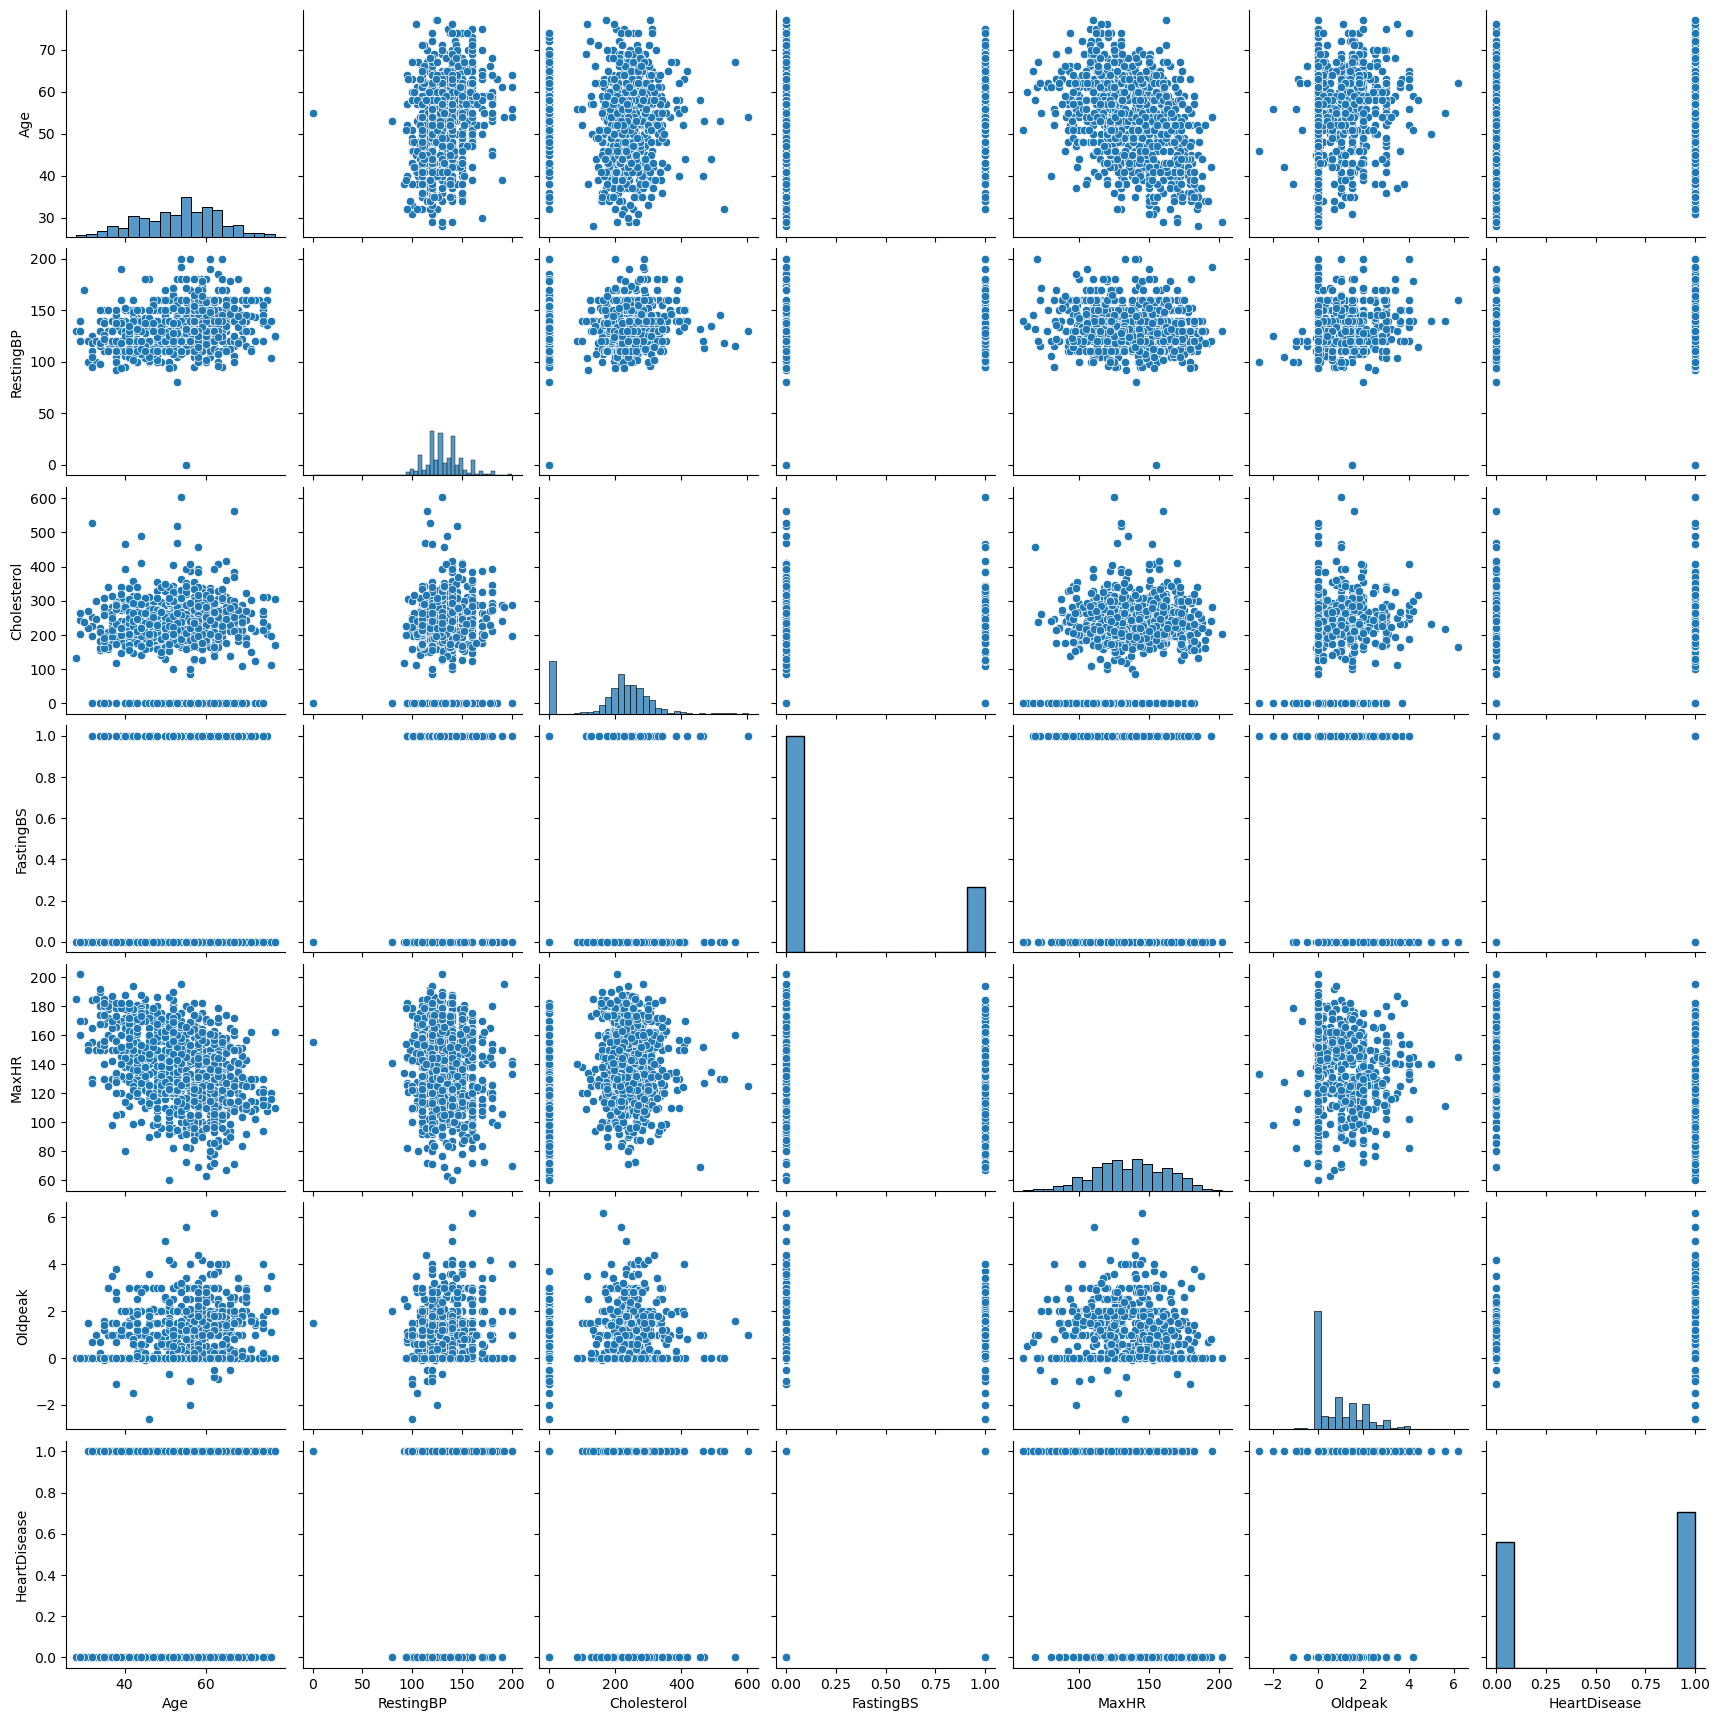

In [17]:
sns.pairplot(df)
plt.show()

In [18]:
X = df_encoded.drop('HeartDisease', axis=1)
Y = df_encoded['HeartDisease']

In [19]:
X.head(3)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Category_F,Category_M,Category_ASY,Category_ATA,Category_NAP,Category_TA,Category_LVH,Category_Normal,Category_ST,Category_N,Category_Y,Category_Down,Category_Flat,Category_Up
0,40,140,289,0,172,0.0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,1,0,0,0,0,1,1,0,0,0,1


In [20]:
Y.head(3)

0    0
1    1
2    0
Name: HeartDisease, dtype: int64

# Logistic Regression

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.3,random_state=1)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logmodel = LogisticRegression()

In [22]:
logmodel.fit(X_train,Y_train)

LogisticRegression()

In [23]:
predictions=logmodel.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,predictions)

array([[ 97,  12],
       [ 20, 147]])

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, predictions)

0.8840579710144928

Let's try standardization technique

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [27]:
logModelScaled = LogisticRegression()

In [28]:
logModelScaled.fit(X_train_scaled, Y_train)

LogisticRegression()

In [29]:
logModelScaled.score(X_test_scaled, Y_test)

0.8731884057971014

using GridSearchCV hypertuning

In [30]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(estimator=logModelScaled, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train_scaled, Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [31]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}


In [32]:
best_model= grid_search.best_estimator_
best_model.fit(X_train_scaled, Y_train)

LogisticRegression(C=0.01, solver='saga')

In [33]:
y_pred = grid_search.predict(X_test_scaled)

In [34]:
y_pred_best_model= best_model.predict(X_test_scaled)

In [35]:
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.8804347826086957


In [36]:
grid_search.score(X_test_scaled,Y_test)

0.8804347826086957

In [37]:
accuracy = accuracy_score(Y_test, y_pred_best_model)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.8804347826086957


In [38]:
best_model.score(X_test_scaled,Y_test)

0.8804347826086957

# Decision Tree

In [39]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [40]:
dt_model.predict(X_test)

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0])

In [41]:
dt_model.score(X_train, Y_train)

1.0

In [42]:
dt_model.score(X_test, Y_test)

0.7572463768115942

In [43]:
path = dt_model.cost_complexity_pruning_path(X_train, Y_train)
path
ccp_alpha = path.ccp_alphas
ccp_alpha

array([0.        , 0.0010156 , 0.00123186, 0.00124611, 0.00129803,
       0.00138456, 0.00138456, 0.00140187, 0.00144637, 0.00145379,
       0.00145379, 0.00146601, 0.00148305, 0.00149533, 0.00151578,
       0.00178015, 0.00188754, 0.00201391, 0.00207684, 0.00207684,
       0.00207684, 0.00233645, 0.00234017, 0.00237354, 0.00242298,
       0.00249221, 0.00259605, 0.00265949, 0.00267023, 0.002756  ,
       0.00280374, 0.00290042, 0.00291297, 0.0029626 , 0.00348096,
       0.00376068, 0.00380755, 0.00459365, 0.00460081, 0.00484044,
       0.00536433, 0.00595985, 0.00697819, 0.00726981, 0.00789747,
       0.00962244, 0.01402088, 0.0188805 , 0.04559316, 0.18637791])

In [44]:
dt_model2 = []
for ccp in ccp_alpha:
    dt_m  = DecisionTreeClassifier(ccp_alpha=ccp)
    dt_m.fit(X_train,Y_train)
    dt_model2.append(dt_m)

In [45]:
dt_model2

[DecisionTreeClassifier(),
 DecisionTreeClassifier(ccp_alpha=0.001015599146440268),
 DecisionTreeClassifier(ccp_alpha=0.0012318647085002247),
 DecisionTreeClassifier(ccp_alpha=0.0012461059190031149),
 DecisionTreeClassifier(ccp_alpha=0.0012980269989615785),
 DecisionTreeClassifier(ccp_alpha=0.0013845621322256835),
 DecisionTreeClassifier(ccp_alpha=0.0013845621322256835),
 DecisionTreeClassifier(ccp_alpha=0.001401869158878505),
 DecisionTreeClassifier(ccp_alpha=0.001446372941700045),
 DecisionTreeClassifier(ccp_alpha=0.0014537902388369682),
 DecisionTreeClassifier(ccp_alpha=0.0014537902388369682),
 DecisionTreeClassifier(ccp_alpha=0.001466006963533077),
 DecisionTreeClassifier(ccp_alpha=0.0014830518835859297),
 DecisionTreeClassifier(ccp_alpha=0.0014953271028037378),
 DecisionTreeClassifier(ccp_alpha=0.0015157840902664593),
 DecisionTreeClassifier(ccp_alpha=0.0017801513128615934),
 DecisionTreeClassifier(ccp_alpha=0.0018875371649709808),
 DecisionTreeClassifier(ccp_alpha=0.0020139085559

Text(0, 0.5, 'score')

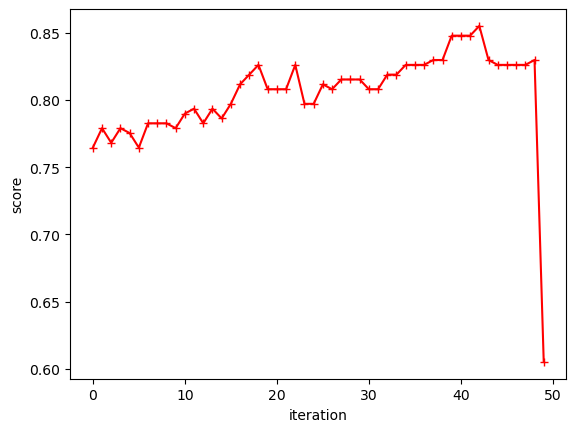

In [46]:
dt_model2 = []
score = []
for i in ccp_alpha:
    dt_m = DecisionTreeClassifier(ccp_alpha = i)
    dt_m.fit(X_train,Y_train)
    dt_model2.append(dt_m)
    score.append(dt_m.score(X_test, Y_test))

    
plt.plot(score, 'r-+')
plt.xlabel('iteration')
plt.ylabel('score')

In [47]:
train_score = [i.score(X_train,Y_train) for i in dt_model2]
test_score = [i.score(X_test ,Y_test) for i in dt_model2]

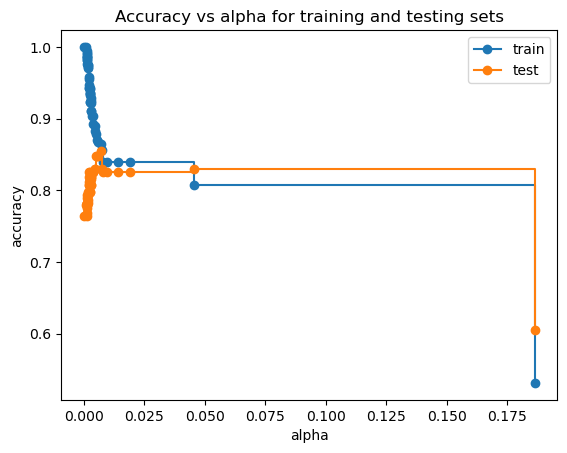

In [48]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alpha, train_score, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alpha, test_score, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [49]:
dt_with_ccp = DecisionTreeClassifier(random_state=0, ccp_alpha=0.007897469530524122)
dt_with_ccp.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.007897469530524122, random_state=0)

In [50]:
dt_with_ccp.score(X_test, Y_test)

0.8260869565217391

# RandomForest

In [51]:
rf = RandomForestClassifier(n_jobs=2, random_state=0)
rf.fit(X_train, Y_train)

RandomForestClassifier(n_jobs=2, random_state=0)

In [52]:
rf.score(X_test, Y_test)

0.8768115942028986

In [53]:
rf.score(X_train, Y_train)

1.0

In [54]:
rf1 = RandomForestClassifier(n_jobs=2, random_state=0)

In [55]:
rf1.fit(X_train_scaled,Y_train)

RandomForestClassifier(n_jobs=2, random_state=0)

In [56]:
rf1.score(X_test_scaled, Y_test)

0.8768115942028986

using GridSearchCV

In [57]:
param_grid = [
{'n_estimators': [10, 25], 'max_features': [5, 10], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_forest = GridSearchCV(rf1, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_forest.fit(X_train_scaled, Y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_jobs=2, random_state=0),
             param_grid=[{'bootstrap': [True, False],
                          'max_depth': [10, 50, None], 'max_features': [5, 10],
                          'n_estimators': [10, 25]}],
             scoring='neg_mean_squared_error')

In [58]:
cvres = grid_search_forest.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.40815014205747674 {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 10}
0.40448210001280555 {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 25}
0.42136454160628767 {'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'n_estimators': 10}
0.40439294485210037 {'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'n_estimators': 25}
0.41573614043229207 {'bootstrap': True, 'max_depth': 50, 'max_features': 5, 'n_estimators': 10}
0.40239666614309433 {'bootstrap': True, 'max_depth': 50, 'max_features': 5, 'n_estimators': 25}
0.4195349989984333 {'bootstrap': True, 'max_depth': 50, 'max_features': 10, 'n_estimators': 10}
0.39060480717038726 {'bootstrap': True, 'max_depth': 50, 'max_features': 10, 'n_estimators': 25}
0.41573614043229207 {'bootstrap': True, 'max_depth': None, 'max_features': 5, 'n_estimators': 10}
0.40239666614309433 {'bootstrap': True, 'max_depth': None, 'max_features': 5, 'n_estimators': 25}
0.4195349989984333 {'bootstrap': 

In [59]:
grid_search_forest.best_estimator_

RandomForestClassifier(max_depth=50, max_features=10, n_estimators=25, n_jobs=2,
                       random_state=0)

In [60]:
best_model=grid_search_forest.best_estimator_
rf_pred_gsc = best_model.predict(X_test_scaled)
rf_pred_gsc

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0])

In [61]:
trainAccuracyGSC = accuracy_score(Y_test, rf_pred_gsc)
trainAccuracyGSC

0.8478260869565217

K-foldCV and cross validation

In [62]:
from sklearn.model_selection import cross_val_score

rf_kfoldcv = RandomForestClassifier(n_estimators=100, random_state=42)
cv_scores = cross_val_score(rf_kfoldcv, X, Y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.90217391 0.82608696 0.83152174 0.83606557 0.7704918 ]
Mean Accuracy: 0.8332679971489666


In [63]:
final_rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
final_rf_model.fit(X_train_scaled, Y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [64]:
final_rf_model.score(X_test_scaled,Y_test)

0.8840579710144928

In [65]:
from sklearn.model_selection import StratifiedKFold

In [66]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cnt = 1


# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, Y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1


Fold:1, Train set: 734, Test set:184
Fold:2, Train set: 734, Test set:184
Fold:3, Train set: 734, Test set:184
Fold:4, Train set: 735, Test set:183
Fold:5, Train set: 735, Test set:183


In [67]:
score = cross_val_score(ensemble.RandomForestClassifier(random_state= 42), X, Y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.90217391 0.875      0.83152174 0.89071038 0.81420765]
Average score: 0.86


RandomizedSearchCv

In [68]:
from sklearn.model_selection import RandomizedSearchCV

rsc = RandomForestClassifier()
param_dist = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=rsc,
    param_distributions=param_dist,
    n_iter=10,  # Number of parameter settings that are sampled
    cv=5,      # Number of cross-validation folds
    scoring='accuracy',
    random_state=42
)

random_search.fit(X_train_scaled, Y_train)
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}


In [69]:
y_pred=best_model.predict(X_test_scaled)
acc = accuracy_score(Y_test,y_pred)
acc

0.8876811594202898

In [70]:
confusion_matrix(Y_test, y_pred)

array([[ 94,  15],
       [ 16, 151]])